# Interpolación polinomial en la forma de Lagrange

Dado un conjunto de $k+1$ puntos

$$(x_0,y_0),\ldots,(x_j,y_j),\ldots,(x_k,y_k)$$

donde las $x_j$ no son iguales, la interpolación polinomial en la forma de Lagrange es una combinación lineal

$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$

de las bases polinomiales de Lagrange

$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$

Para cada $i \ne j$, $l_j(x)$ incluye el término $(x-x_i)$ en el numerador, entonces el producto entero será cero en $x=x_i$:

$$l_{j\ne i}(x_i) = \prod_{m \ne j} \frac{x_i-x_m}{x_j-x_m} = \frac{x_i-x_0}{x_j-x_0} \ldots \frac{x_i-x_i}{x_j-x_i} \ldots \frac{x_i-x_k}{x_j-x_k} = 0.$$

Por otro lado

$$l_i(x_i) = \prod_{m \ne i} \frac{x_i-x_m}{x_i-x_m} = 1,$$

en otras palabras, todas las bases polinomiales son cero en $x=x_i$, excepto $l_i(x_i)$, para la cual se tiene $l_i(x_i)=1$. Lo que sigue es que $y_il_i(x_i) = y_i$, entonces para cada punto $x_i$, $L(x_i) = y_i+0+0+\ldots+0 = y_i$, demostrando que $L$ interpola a la función de manera exacta.

In [83]:
listx = [1,5,-2];

In [84]:
listy = [2,7,8];

In [6]:
using PyPlot

INFO: Recompiling stale cache file /home/lorena/.julia/lib/v0.6/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /home/lorena/.julia/lib/v0.6/PyPlot.ji for module PyPlot.


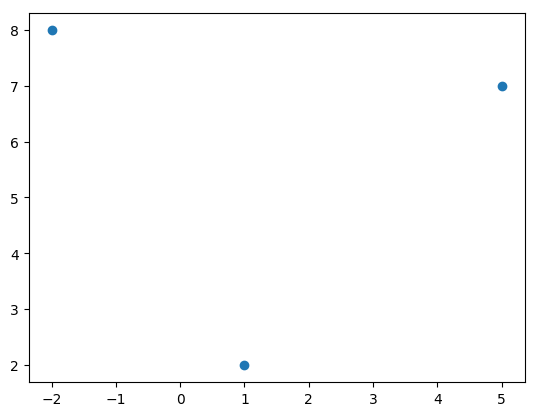

PyObject <matplotlib.collections.PathCollection object at 0x7fab198c4550>

In [85]:
scatter(listx,listy)

In [39]:
using SymPy

INFO: Recompiling stale cache file /home/lorena/.julia/lib/v0.6/SymPy.ji for module SymPy.


In [86]:
function bases(index,list)
    l=1
    for i = 1:length(list)
         if i != index
            l = l*(Sym("x")-list[i])/(list[index]-list[i])
         end
    end
    return l
end

bases (generic function with 2 methods)

In [97]:
function Lagrange(list1,list2)
    L=0
    for i = 1:length(list2)
       L = L + bases(i,list1)*list2[i]
    end
    return expand(L)
end

Lagrange (generic function with 2 methods)

In [98]:
Lagrange(listx,listy)

    2            
13⋅x    43⋅x   43
───── - ──── + ──
  28     28    14

In [104]:
x=linspace(-3,6,1000);

In [109]:
y=Lagrange(listx,listy).(x);

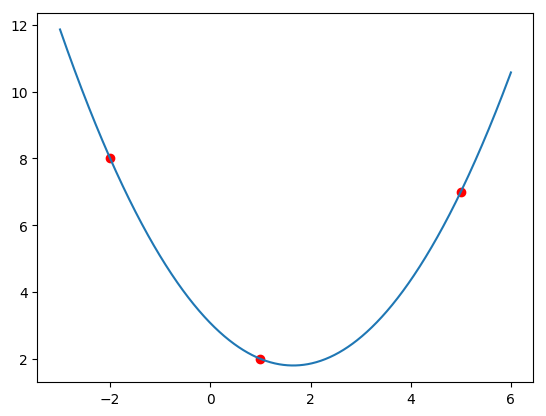

In [116]:
scatter(listx,listy,color="red")
plot(x,y)
show()

In [99]:
a=Lagrange(listx,listy)

    2            
13⋅x    43⋅x   43
───── - ──── + ──
  28     28    14

In [103]:
a(-2)

8